# Activity 1.2 : Training Neural Networks - de Leon


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
484,0,145,0,0,0,44.2,0.630,31,1
42,7,106,92,18,0,22.7,0.235,48,0
490,2,83,65,28,66,36.8,0.629,24,0
392,1,131,64,14,415,23.7,0.389,21,0
98,6,93,50,30,64,28.7,0.356,23,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values


Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 18ms/step - loss: 0.8656 - accuracy: 0.3976 - val_loss: 0.8793 - val_accuracy: 0.4271
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.8257 - accuracy: 0.4201 - val_loss: 0.8393 - val_accuracy: 0.4531
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7912 - accuracy: 0.4566 - val_loss: 0.8048 - val_accuracy: 0.4948
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7612 - accuracy: 0.4844 - val_loss: 0.7749 - val_accuracy: 0.5417
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7348 - accuracy: 0.5208 - val_loss: 0.7491 - val_accuracy: 0.5573
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7116 - accuracy: 0.5486 - val_loss: 0.7265 - val_accuracy: 0.5833
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5799 - val_loss: 0.7063 - val_accuracy: 0.5938
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.55269986],
       [0.72737   ],
       [0.33087015],
       [0.14952181],
       [0.2388396 ],
       [0.5021038 ],
       [0.01537702],
       [0.24771738],
       [0.9610592 ],
       [0.1646194 ]], dtype=float32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.55269986],
       [0.72737   ],
       [0.33087015],
       [0.14952181],
       [0.2388396 ],
       [0.5021038 ],
       [0.01537702],
       [0.24771738],
       [0.9610592 ],
       [0.1646194 ]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

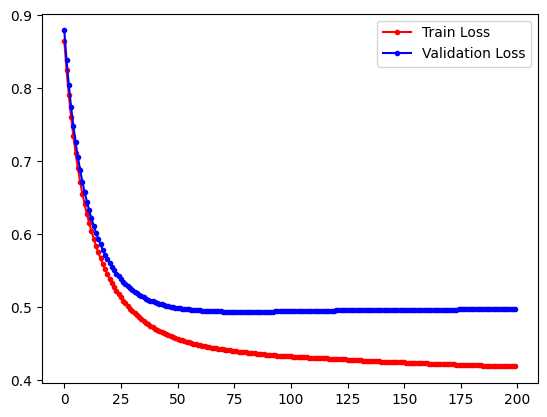

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

- The figure above denotes the process at which the neural network learns. We can see that for the initial epochs, the model has not yet encountered the data we had inputted initially, to which is then reflected with a high loss. However, as the model starts to make out the underlying relationships between the variables, the loss gradually goes down, indicating that the model is learning without overfitting.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
#Build a model with two hidden layers, each with six nodes
#use relu for the 2 hidden layers and sigmoid for the final layer

model2 = Sequential()

#hidden layer

model2.add(Dense(6, activation = 'relu'))
model2.add(Dense(6, activation = 'relu'))

#output layer

model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#use a learning rate of .003 and train for 1500 epochs

model2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 14ms/step - loss: 1.3157 - accuracy: 0.3542 - val_loss: 1.0958 - val_accuracy: 0.3958
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.9884 - accuracy: 0.4097 - val_loss: 0.8692 - val_accuracy: 0.4375
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.8156 - accuracy: 0.5156 - val_loss: 0.7496 - val_accuracy: 0.5677
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7210 - accuracy: 0.6059 - val_loss: 0.6822 - val_accuracy: 0.6458
Epoch 5/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.6655 - accuracy: 0.6580 - val_loss: 0.6422 - val_accuracy: 0.6667
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6314 - accuracy: 0.7014 - val_loss: 0.6173 - val_accuracy: 0.6771
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6088 - accuracy: 0.7083 - val_loss: 0.6006 - val_accuracy: 0.7083
Epoch

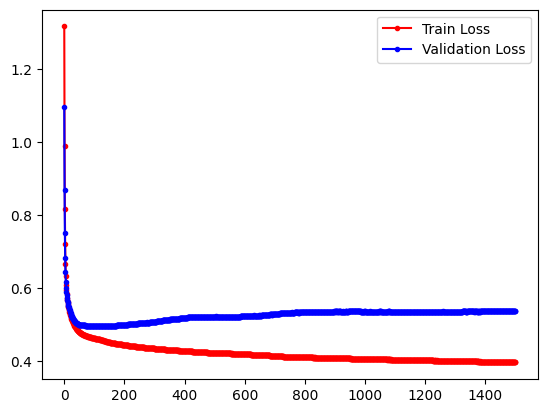

In [ ]:
#graph the trajectory

run_hist_2.history.keys()

fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

# Conclusion

- In the given figure we can see that the validation_loss and loss decreases with each passing epoch. However, further analyzing the graph we can notice that the validation_loss slowly starts to increase as the epoch continues, this could signify that the model is too complex for the number of data available and the model is memorizing the training data to well to the point that it does not perform well on unseen data.

# Alternative Network: Using 2 Hidden Layers and 2 Nodes in the Output Layer

Network Summary

- In this alternative network, we've split the output to two categories using the get dummies function in pandas. We've also changed the activation function of the output layer to softmax, as it is usually used for mutually exclusive categories where an instance can only possess one class at a time.

In [ ]:
#Adding column names to the dataset.

databaseDiabetes = pd.read_csv('pima-indians-diabetes.csv', header=None)
databaseDiabetes.rename(columns = {0: 'Pregnancies', 1: 'Glucose', 2: 'BloodPressure', 3: 'SkinThickness', 4: 'Insulin', 5: 'BMI', 6: 'DiabetesPedigree', 7: 'Age', 8: 'Outcome'},
                        inplace = True)
databaseDiabetes.to_csv('diabetesFrame.csv', index = False)

#Verify changes

finalDatabase = pd.read_csv('diabetesFrame.csv')
finalDatabase.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#splitting the output to positivea and negative classes

y2 = pd.get_dummies(finalDatabase['Outcome'].map({1: 'Positive', 0: 'Negative'}))
finalDatabase = pd.concat([finalDatabase, y2], axis=1)
finalDatabase = finalDatabase.drop('Outcome', axis=1)


In [ ]:
finalDatabase.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Negative,Positive
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,1,0
2,8,183,64,0,0,23.3,0.672,32,0,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,0,1


In [ ]:
#splitting the dataset into test and train

columnsdata = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
               'DiabetesPedigree', 'Age']
x2 = finalDatabase[list(columnsdata)].values

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.3)

In [ ]:
#use different learning rates and epochs

model3 = Sequential()
model4 = Sequential()
model5 = Sequential()

#alternative epoch model (200 epochs)

model3.add(Dense(6, activation = 'relu'))
model3.add(Dense(3, activation = 'relu'))
model3.add(Dense(2, activation = 'softmax'))

#for 500 epochs

model4.add(Dense(6, activation = 'relu'))
model4.add(Dense(3, activation = 'relu'))
model4.add(Dense(2, activation = 'softmax'))

#for 1500 epochs

model5.add(Dense(6, activation = 'relu'))
model5.add(Dense(3, activation = 'relu'))
model5.add(Dense(2, activation = 'softmax'))

normalizer = StandardScaler()
x2_train_norm = normalizer.fit_transform(x2_train)
x2_test_norm = normalizer.transform(x2_test)


In [ ]:
#200 epochs

model3.compile(SGD(lr = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model3.fit(x2_train_norm, y2_train, validation_data=(x2_test_norm, y2_test), epochs=200)


Epoch 1/200
17/17 [==============================] - 1s 16ms/step - loss: 0.7461 - accuracy: 0.6667 - val_loss: 0.7751 - val_accuracy: 0.6147
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7293 - accuracy: 0.6667 - val_loss: 0.7564 - val_accuracy: 0.6147
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7153 - accuracy: 0.6685 - val_loss: 0.7407 - val_accuracy: 0.6147
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7033 - accuracy: 0.6667 - val_loss: 0.7270 - val_accuracy: 0.6190
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.6667 - val_loss: 0.7152 - val_accuracy: 0.6190
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.6667 - val_loss: 0.7048 - val_accuracy: 0.6190
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.6667 - val_loss: 0.6956 - val_accuracy: 0.6190
Epoch 8/200


In [ ]:
#500 epochs

model4.compile(SGD(lr = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_4= model4.fit(x2_train_norm, y2_train, validation_data=(x2_test_norm, y2_test), epochs=500)

Epoch 1/500
17/17 [==============================] - 1s 14ms/step - loss: 0.7383 - accuracy: 0.6276 - val_loss: 0.7222 - val_accuracy: 0.6667
Epoch 2/500
17/17 [==============================] - 0s 5ms/step - loss: 0.7289 - accuracy: 0.6387 - val_loss: 0.7137 - val_accuracy: 0.6710
Epoch 3/500
17/17 [==============================] - 0s 4ms/step - loss: 0.7210 - accuracy: 0.6425 - val_loss: 0.7064 - val_accuracy: 0.6797
Epoch 4/500
17/17 [==============================] - 0s 4ms/step - loss: 0.7141 - accuracy: 0.6406 - val_loss: 0.7002 - val_accuracy: 0.6753
Epoch 5/500
17/17 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.6406 - val_loss: 0.6946 - val_accuracy: 0.6753
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 0.7030 - accuracy: 0.6406 - val_loss: 0.6897 - val_accuracy: 0.6753
Epoch 7/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.6406 - val_loss: 0.6853 - val_accuracy: 0.6753
Epoch 8/500


In [ ]:
model5.compile(SGD(lr = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_5= model5.fit(x2_train_norm, y2_train, validation_data=(x2_test_norm, y2_test), epochs=1500)

Epoch 1/1500
17/17 [==============================] - 1s 16ms/step - loss: 0.8608 - accuracy: 0.3743 - val_loss: 0.8332 - val_accuracy: 0.3550
Epoch 2/1500
17/17 [==============================] - 0s 5ms/step - loss: 0.8109 - accuracy: 0.3799 - val_loss: 0.7912 - val_accuracy: 0.4026
Epoch 3/1500
17/17 [==============================] - 0s 5ms/step - loss: 0.7756 - accuracy: 0.4004 - val_loss: 0.7618 - val_accuracy: 0.4156
Epoch 4/1500
17/17 [==============================] - 0s 5ms/step - loss: 0.7500 - accuracy: 0.4432 - val_loss: 0.7408 - val_accuracy: 0.4242
Epoch 5/1500
17/17 [==============================] - 0s 4ms/step - loss: 0.7322 - accuracy: 0.4581 - val_loss: 0.7251 - val_accuracy: 0.4545
Epoch 6/1500
17/17 [==============================] - 0s 5ms/step - loss: 0.7186 - accuracy: 0.4879 - val_loss: 0.7121 - val_accuracy: 0.4935
Epoch 7/1500
17/17 [==============================] - 0s 5ms/step - loss: 0.7076 - accuracy: 0.5158 - val_loss: 0.7020 - val_accuracy: 0.5195
Epoch

200 Epochs
- Accuracy: 75.98%
- Validation Accuracy: 77.06%
- Validation Loss: 46.55%
- Loss: 51.04%

500 Epochs
- Accuracy: 77.84%
- Validation Accuracy: 78.35%
- Validation Loss: 44.51%
- Loss: 46.88%

1500 Epochs
- Accuracy: 80.07%
- Validation Accuracy: 79.65%
- Validation Loss: 48.85%
- Loss: 44.27%

# Visualization

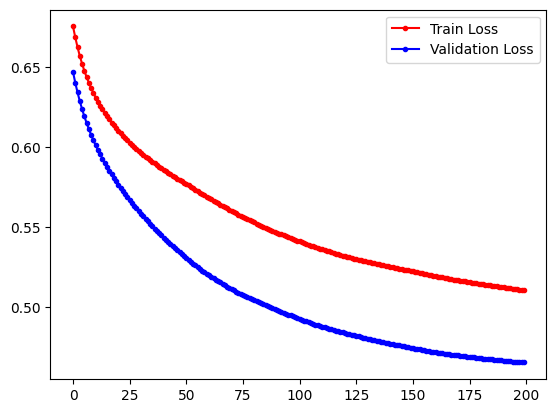

In [ ]:
#graph the trajectory for 200 epochs

run_hist_3.history.keys()

fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

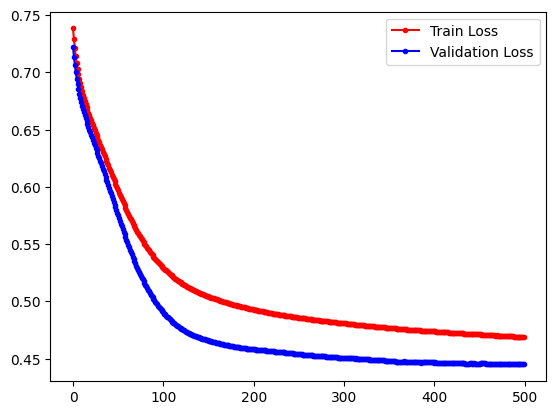

In [ ]:
#trajectory for 500 epochs

run_hist_4.history.keys()

fig, ax = plt.subplots()
ax.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

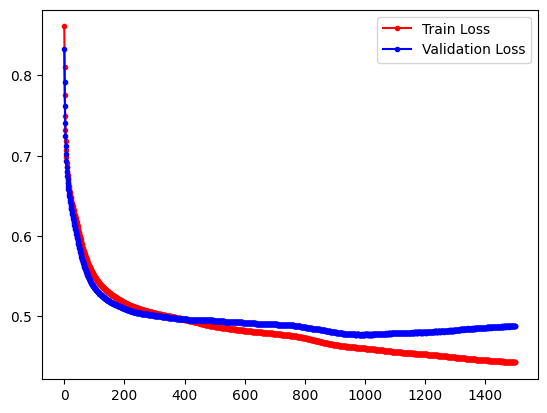

In [ ]:
#trajectory for 1500 epochs

run_hist_5.history.keys()

fig, ax = plt.subplots()
ax.plot(run_hist_5.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_5.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Conclusion

- In conclusion, we've added modified the network by changing the number of nodes present in each layer, furthermore, we've modified the output layer to contain 2 nodes as we had 2 classification classes, which was Positive and Negative.

- In relation to this, changing the epochs to a certain number also helps with the learning of the model, as too many epochs may lead to overfitting whereas the model will not be able to enough opportunity to learn the patterns in the data if the epoch is insuffiecient. According to [Profi](https://www.linkedin.com/advice/3/how-can-you-improve-neural-network-performance-xkrxe#:~:text=If%20we%20train%20for%20too,the%20right%20nr%20of%20epochs.): "*If we train for too many epochs, the network might become too specialized in the training data, memorizing it instead of learning the general patterns*". As evident by the 1500 epochs graph wherein we can notice that validation loss slowly increases.